## what is performance of Liverpool's players based on their position?

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# import dataset

In [288]:
data = pd.read_csv("Liverpool_players_season2020-2021_2021-2022.csv")
# print size of data
print(data.shape)
# show first 10 rows
data.head(10)


(1051, 19)


,Unnamed: 0,Player,shirt_number,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,0,Diogo Jota,20,POR,FW,24-253,60,1,0,0,0,2,2,0,0,22,1,0,0
1,1,Roberto Firmino,9,BRA,FW,29-316,30,1,0,0,0,1,1,0,0,17,1,0,1
2,2,Sadio Mané,10,SEN,LW,29-126,90,0,0,0,0,3,0,0,0,45,1,0,1
3,3,Mohamed Salah,11,EGY,RW,29-060,90,1,2,0,0,5,2,0,0,35,0,0,0
4,4,Naby Keïta,8,GUI,"LM,RM",26-185,82,0,0,0,0,0,0,0,0,52,6,0,2
5,5,Harvey Elliott,67,ENG,RM,18-132,8,0,0,0,0,0,0,0,0,7,0,0,0
6,6,James Milner,7,ENG,"CM,LM",35-222,90,0,0,0,0,0,0,1,0,81,3,2,2
7,7,Alex Oxlade-Chamberlain,15,ENG,RM,27-364,60,0,0,0,0,2,0,0,0,28,0,1,1
8,8,Fabinho,3,BRA,CM,27-295,30,0,0,0,0,0,0,0,0,25,0,0,2
9,9,Kostas Tsimikas,21,GRE,LB,25-094,90,0,0,0,0,2,1,0,0,77,3,0,1


# data preprocessing and cleaning

In [289]:
# remove irrelevant variables
data = data.drop(["shirt_number"], axis=1) 
# remove first column
data = data.iloc[:,1:]
# convert Age to numeric
data["Age"] = data["Age"].str[:2].astype(int)
# remove any rows with missing data
data = data.dropna() 
# Split the strings in the "Pos" column by comma and keep only the first position listed
data["Pos"] = data["Pos"].str.split(",", n=1, expand=True)[0]
# show first 10 rows
data.head(10)

,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks
0,Diogo Jota,POR,FW,24,60,1,0,0,0,2,2,0,0,22,1,0,0
1,Roberto Firmino,BRA,FW,29,30,1,0,0,0,1,1,0,0,17,1,0,1
2,Sadio Mané,SEN,LW,29,90,0,0,0,0,3,0,0,0,45,1,0,1
3,Mohamed Salah,EGY,RW,29,90,1,2,0,0,5,2,0,0,35,0,0,0
4,Naby Keïta,GUI,LM,26,82,0,0,0,0,0,0,0,0,52,6,0,2
5,Harvey Elliott,ENG,RM,18,8,0,0,0,0,0,0,0,0,7,0,0,0
6,James Milner,ENG,CM,35,90,0,0,0,0,0,0,1,0,81,3,2,2
7,Alex Oxlade-Chamberlain,ENG,RM,27,60,0,0,0,0,2,0,0,0,28,0,1,1
8,Fabinho,BRA,CM,27,30,0,0,0,0,0,0,0,0,25,0,0,2
9,Kostas Tsimikas,GRE,LB,25,90,0,0,0,0,2,1,0,0,77,3,0,1


# performace extraction

In [290]:
data["ScoringContribution"] = data["Gls"] + data["Ast"]
data["DefensiveContribution"] = data["Tkl"] + data["Int"] + data["Blocks"]

# print unique values in Pos
print(data["Pos"].unique())
# make a per
data.sample(10)


['FW' 'LW' 'RW' 'LM' 'RM' 'CM' 'LB' 'CB' 'RB' 'GK' 'AM' 'DM']


,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,ScoringContribution,DefensiveContribution
445,Sadio Mané,SEN,FW,30,59,0,0,0,0,2,0,1,0,41,0,0,2,0,2
523,Roberto Firmino,BRA,AM,30,21,0,1,0,0,1,0,0,0,23,1,0,0,1,1
299,Andrew Robertson,SCO,LB,27,90,0,2,0,0,2,1,0,0,85,1,0,0,2,1
237,Sadio Mané,SEN,LW,29,81,0,0,0,0,2,0,0,0,51,2,0,1,0,3
673,Jordan Henderson,ENG,RM,30,80,0,1,0,0,0,0,0,0,93,1,0,0,1,1
569,Trent Alexander-Arnold,ENG,RB,21,90,0,1,0,0,2,0,1,0,102,1,1,0,1,2
479,Jordan Henderson,ENG,RM,31,64,0,0,0,0,2,0,0,0,67,0,0,1,0,1
430,Alisson,BRA,GK,29,90,0,0,0,0,0,0,0,0,55,0,0,0,0,0
150,Alisson,BRA,GK,29,90,0,0,0,0,0,0,0,0,30,0,0,0,0,0
190,Joël Matip,CMR,CB,30,90,0,0,0,0,1,0,0,0,67,0,2,2,0,4


In [291]:
# for LW and RW and FW and AM we will ATACK
dataCpy = data.copy()
data["Pos"] = data["Pos"].replace(["LW", "RW", "FW", "AM"], "ATTACK")
# for LB and RB and CB and DM we will DEFENCE 
data["Pos"] = data["Pos"].replace(["LB", "RB", "CB", "DM"], "DEFENCE")
# for CM and LM and RM we will MIDFIELD
data["Pos"] = data["Pos"].replace(["CM", "LM", "RM"], "MIDFIELD")

# delete rows with GK
data = data[data.Pos != "GK"]

# add column named "perormance" and set it to 0
data["performance"] = 0

# make and formula for performance based on unique values in Pos
#data.loc[data["Pos"] == "GK", "performance"] = data["Saves"] * 2 + data["CS"] * 5 + data["Gls"] * 6 + data["Ast"] * 3 + data["Tkl"] * 1 + data["Int"] * 1 + data["Blocks"] * 1
data.loc[data["Pos"] == "DEFENCE", "performance"] = (data["Gls"] * 1 + data["Ast"] * 1 + data["Tkl"] * 6 + data["Int"] * 6 + data["Blocks"] * 6) / (data['Min']/60)
data.loc[data["Pos"] == "MIDFIELD", "performance"] = (data["Gls"] * 3 + data["Ast"] * 6 + data["Tkl"] * 2 + data["Int"] * 3 + data["Blocks"] * 3) / (data['Min']/60)
data.loc[data["Pos"] == "ATTACK", "performance"] = (data["Gls"]*6 + data["Ast"] * 3 + data["Tkl"] * 1 + data["Int"] * 1 + data["Blocks"] * 1) / (data['Min']/60)


In [292]:
data.head(10)

,Player,Nation,Pos,Age,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Tkl,Int,Blocks,ScoringContribution,DefensiveContribution,performance
0,Diogo Jota,POR,ATTACK,24,60,1,0,0,0,2,2,0,0,22,1,0,0,1,1,7.000000
1,Roberto Firmino,BRA,ATTACK,29,30,1,0,0,0,1,1,0,0,17,1,0,1,1,2,16.000000
2,Sadio Mané,SEN,ATTACK,29,90,0,0,0,0,3,0,0,0,45,1,0,1,0,2,1.333333
3,Mohamed Salah,EGY,ATTACK,29,90,1,2,0,0,5,2,0,0,35,0,0,0,3,0,8.000000
4,Naby Keïta,GUI,MIDFIELD,26,82,0,0,0,0,0,0,0,0,52,6,0,2,0,8,13.170732
5,Harvey Elliott,ENG,MIDFIELD,18,8,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0.000000
6,James Milner,ENG,MIDFIELD,35,90,0,0,0,0,0,0,1,0,81,3,2,2,0,7,12.000000
7,Alex Oxlade-Chamberlain,ENG,MIDFIELD,27,60,0,0,0,0,2,0,0,0,28,0,1,1,0,2,6.000000
8,Fabinho,BRA,MIDFIELD,27,30,0,0,0,0,0,0,0,0,25,0,0,2,0,2,12.000000
9,Kostas Tsimikas,GRE,DEFENCE,25,90,0,0,0,0,2,1,0,0,77,3,0,1,0,4,16.000000


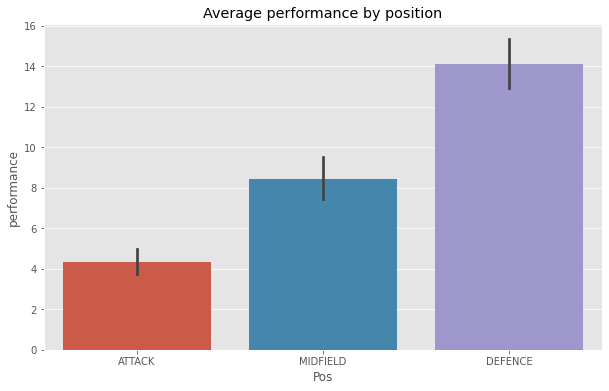

In [293]:
# for each position we will make a an average of performance 
# plot the data using a countplot in x axis we have Pos and in y axis we have average of performance
plt.figure(figsize=(10, 6))
sns.barplot(x="Pos", y="performance", data=data)
plt.title("Average performance by position")
plt.show()

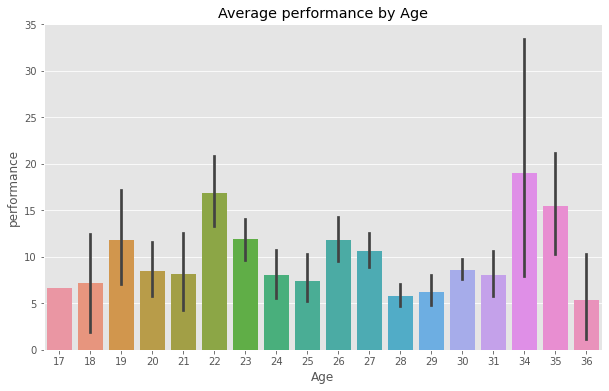

In [294]:
# for each Age we will make a an average of performance
# plot the data using a countplot in x axis we have Age and in y axis we have average of performance
plt.figure(figsize=(10, 6))
sns.barplot(x="Age", y="performance", data=data)
plt.title("Average performance by Age")
plt.show()



In [295]:
data= dataCpy.copy()

# inferential statistics

## Are there any statistically significant differences in the performance of Liverpool's players based on their age, position, or other demographic factors?


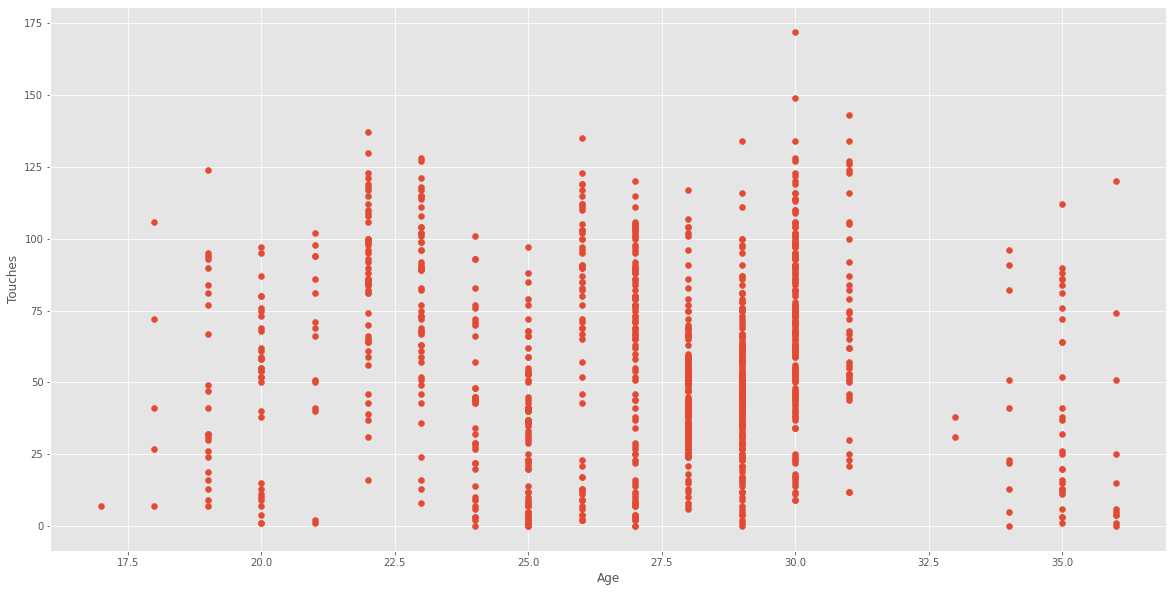

Correlation coefficient: -0.06
p-value: 0.0418


In [296]:
import scipy.stats as stats
# is there a significant relationship between age and performance (number of time player touch the ball)?
plt.scatter(data["Age"], data["Touches"])
plt.xlabel("Age")
plt.ylabel("Touches")
plt.show()

# apply Pearson's correlation test
corr, p = stats.pearsonr(data["Age"], data["Touches"])
print("Correlation coefficient: {:.2f}".format(corr))
print("p-value: {:.4f}".format(p))


* As p-value is less than 0.05, we reject the null hypothesis and conclude that there is a difference in the performance of Liverpool's players based on their age. correlation coefficient is -0.07, which is a weak negtive correlation.

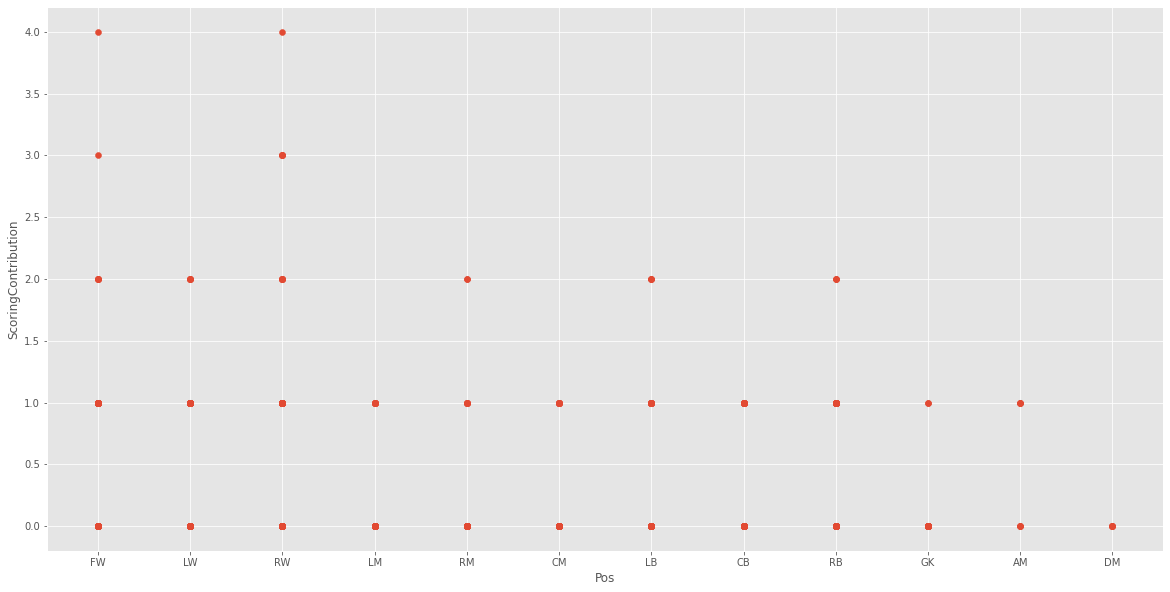

F-statistic: 16.19513800779861
P-value: 1.1868858622250077e-29


In [297]:
# is there a significant relationship between position of the player and ScoringContribution (goals + assists)?
plt.scatter(data["Pos"], data["ScoringContribution"])
# sort the plot if categorical Pos variable has ScoringContribution more so sort the plot

plt.xlabel("Pos")
plt.ylabel("ScoringContribution")
plt.show()

# Grouping the data by position and converting the ScoringContribution column into a list
grouped_data = data.groupby('Pos')['ScoringContribution'].apply(list)

# Performing one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

# Printing the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

* As p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the scoring performance of Liverpool's players based on their position.

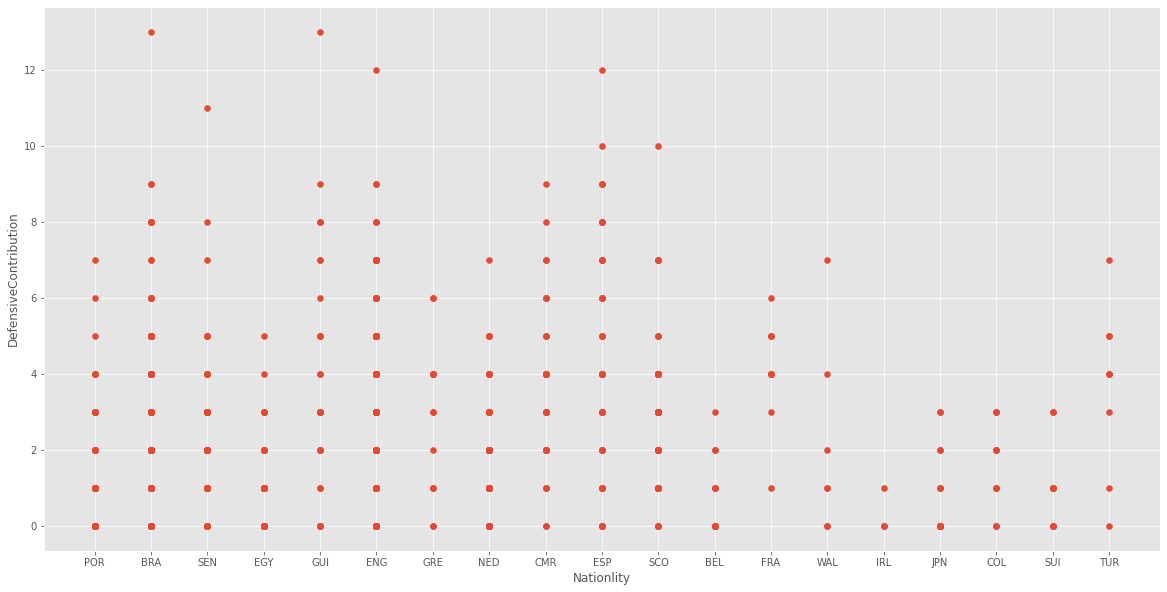

F-statistic: 9.292528649721218
P-value: 4.603923889458798e-24


In [298]:
# is there a significant relationship between Nationlity of the player and DefensiveContribution?
plt.scatter(data["Nation"], data["DefensiveContribution"])
# increase the size of the plot
plt.rcParams['figure.figsize'] = [20, 10]
plt.xlabel("Nationlity")
plt.ylabel("DefensiveContribution")
plt.show()

# Grouping the data by Nationlity and converting the DefensiveContribution column into a list
grouped_data = data.groupby('Nation')['DefensiveContribution'].apply(list)

# Performing one-way ANOVA
f_stat, p_value = stats.f_oneway(*grouped_data)

# Printing the results
print("F-statistic:", f_stat)
print("P-value:", p_value)

* As p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the defensive performance of Liverpool's players based on their nationlity.